In [1]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy import stats
import scipy

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib import cm
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_theme()
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib.ticker import MaxNLocator



In [8]:
data_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf")

analysis_df = pd.read_csv(Path(data_dir, "166_N1/ref_15_merge.csv"), index_col=0)
analysis_df.head()

# cif_names = ["7mhf", "7mhg", "7mhh", "7mhi", "7mhj", "7mhk"]
# Ns = [1, 2, 4, 8]

# mapper_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/35_cif_combos/data/7mhf.csv"), index_col=0)
# analysis_dfs = list()
# for dir_name in ["166_N1", "167_N2", "168_N4", "169_N8"]:
#     analysis_file = Path(data_dir, dir_name, "ref_20.csv")
#     analysis_df = pd.read_csv(analysis_file, index_col=0)
#     analysis_df["N"] = int(dir_name.split("_")[1][1:])
#     analysis_df["J"] = analysis_df.apply(lambda row: len(mapper_df.iloc[row["job_id"]]["cifs"].split(",")), axis=1)
#     analysis_dfs.append(analysis_df)

# analysis_df = pd.concat(analysis_dfs)
# analysis_df.head()

,index,job_id,cif_name,w_0,pdb,r_free,ff,N,J,w_1,w_2,w_3,w_4,w_5,w_6,w_7
0,0,0,7mhf,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.356502,621.926362,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,7mhf,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.353581,597.819673,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,7mhf,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.349175,567.563444,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,7mhf,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.352123,438.141353,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,7mhf,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.357600,611.524850,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# colors = [mcolors.CSS4_COLORS["darkorange"], mcolors.CSS4_COLORS["navy"], mcolors.CSS4_COLORS["darkslateblue"],  mcolors.CSS4_COLORS["darkred"], mcolors.CSS4_COLORS["darkgreen"], mcolors.CSS4_COLORS["cornflowerblue"]]

colors = [ mcolors.CSS4_COLORS["lightgrey"], mcolors.CSS4_COLORS["silver"],  mcolors.CSS4_COLORS["darkgrey"], mcolors.CSS4_COLORS["grey"], mcolors.CSS4_COLORS["dimgrey"], mcolors.CSS4_COLORS["black"]]

400 400
2000 2000
4000 4000
4000 4000
2000 2000
400 400


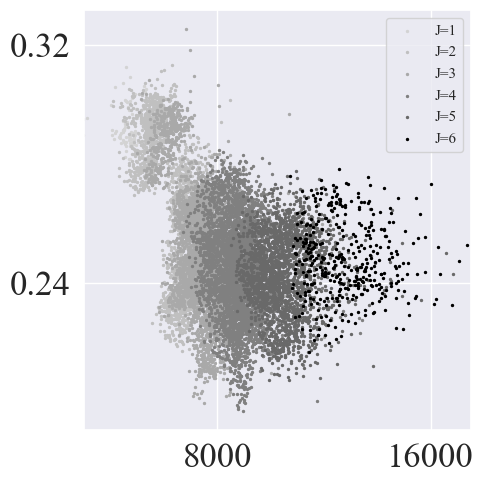

In [62]:
# sample_J_N_df = analysis_df[(analysis_df["cif_name"].isin(["7mhf", "7mhg"])) & (analysis_df["N"] == 1) & (analysis_df["J"] == 1)]
group_2 = ["7mhh", "7mhi", "7mhj", "7mhk"]
group_1 = ["7mhf", "7mhg"]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for J in range(1,7):
    sample_J_N_df = analysis_df[(analysis_df["cif_name"].isin(group_2)) & (analysis_df["N"] == 8) & (analysis_df["J"] == J)]

    xs = sample_J_N_df["ff"]
    ys = sample_J_N_df["r_free"]

    print(len(xs), len(ys))

    ax.scatter(xs, ys, s=2, c=colors[J-1], label="J={}".format(J))

ax.set_xlim(3000,17500)

ax.tick_params(axis='y', labelsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.xaxis.set_major_locator(MaxNLocator(nbins=2))
ax.yaxis.set_major_locator(MaxNLocator(nbins=2))

ax.legend()
plt.tight_layout()
plt.savefig(Path(Path.home(), "Desktop/fig.png"))

# plt.scatter(analysis_df[analysis_df["J"] == 2]["ff"], analysis_df[analysis_df["J"] == 2]["r_free"])

51200


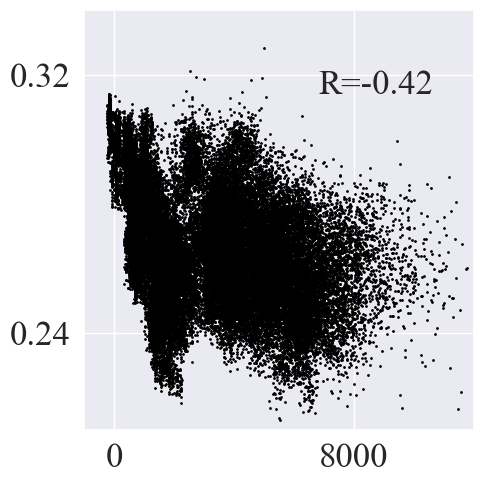

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

good_subset_df = analysis_df[analysis_df["cif_name"].isin(["7mhh", "7mhi", "7mhj", "7mhk"])]
print(len(good_subset_df))

x, y = good_subset_df["ff"], good_subset_df["r_free"]
plt.scatter(x, y, color="black", s=1)
r2 = good_subset_df["ff"].corr(good_subset_df["r_free"])**2

ax.annotate("R={:.2f}".format(x.corr(y)), xy=(.6, .8), xycoords=ax.transAxes, fontsize=25)

ax.set_xlim(-1000, 12000)
ax.set_ylim(.21, .34)


ax.tick_params(axis='y', labelsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.xaxis.set_major_locator(MaxNLocator(nbins=2))
ax.yaxis.set_major_locator(MaxNLocator(nbins=2))

plt.tight_layout()
plt.savefig(Path(Path.home(), "Desktop/fig.png"))

0 0
7mhf 1
0.3277041288116589
0 1
7mhf 2
0.362211492524389
0 2
7mhf 4
0.5395527005695208
0 3
7mhf 8
0.3452422981672606
1 0
7mhg 1
0.5875061122496172
1 1
7mhg 2
0.17903419676046492
1 2
7mhg 4
0.27038344362563127
1 3
7mhg 8
0.20561109202122835
2 0
7mhh 1
-0.5099892994413303
2 1
7mhh 2
-0.4218959425577579
2 2
7mhh 4
-0.5864572500910196
2 3
7mhh 8
-0.5834373401276612
3 0
7mhi 1
-0.584009176663239
3 1
7mhi 2
-0.3856460724394174
3 2
7mhi 4
-0.5365618168569738
3 3
7mhi 8
-0.5422964535684791
4 0
7mhj 1
-0.6853892433052637
4 1
7mhj 2
-0.3902554037299687
4 2
7mhj 4
-0.6070270588002321
4 3
7mhj 8
-0.5757956260866367
5 0
7mhk 1
-0.6036019688130473
5 1
7mhk 2
-0.2752163112270209
5 2
7mhk 4
-0.3860962828716107
5 3
7mhk 8
-0.542474065382388


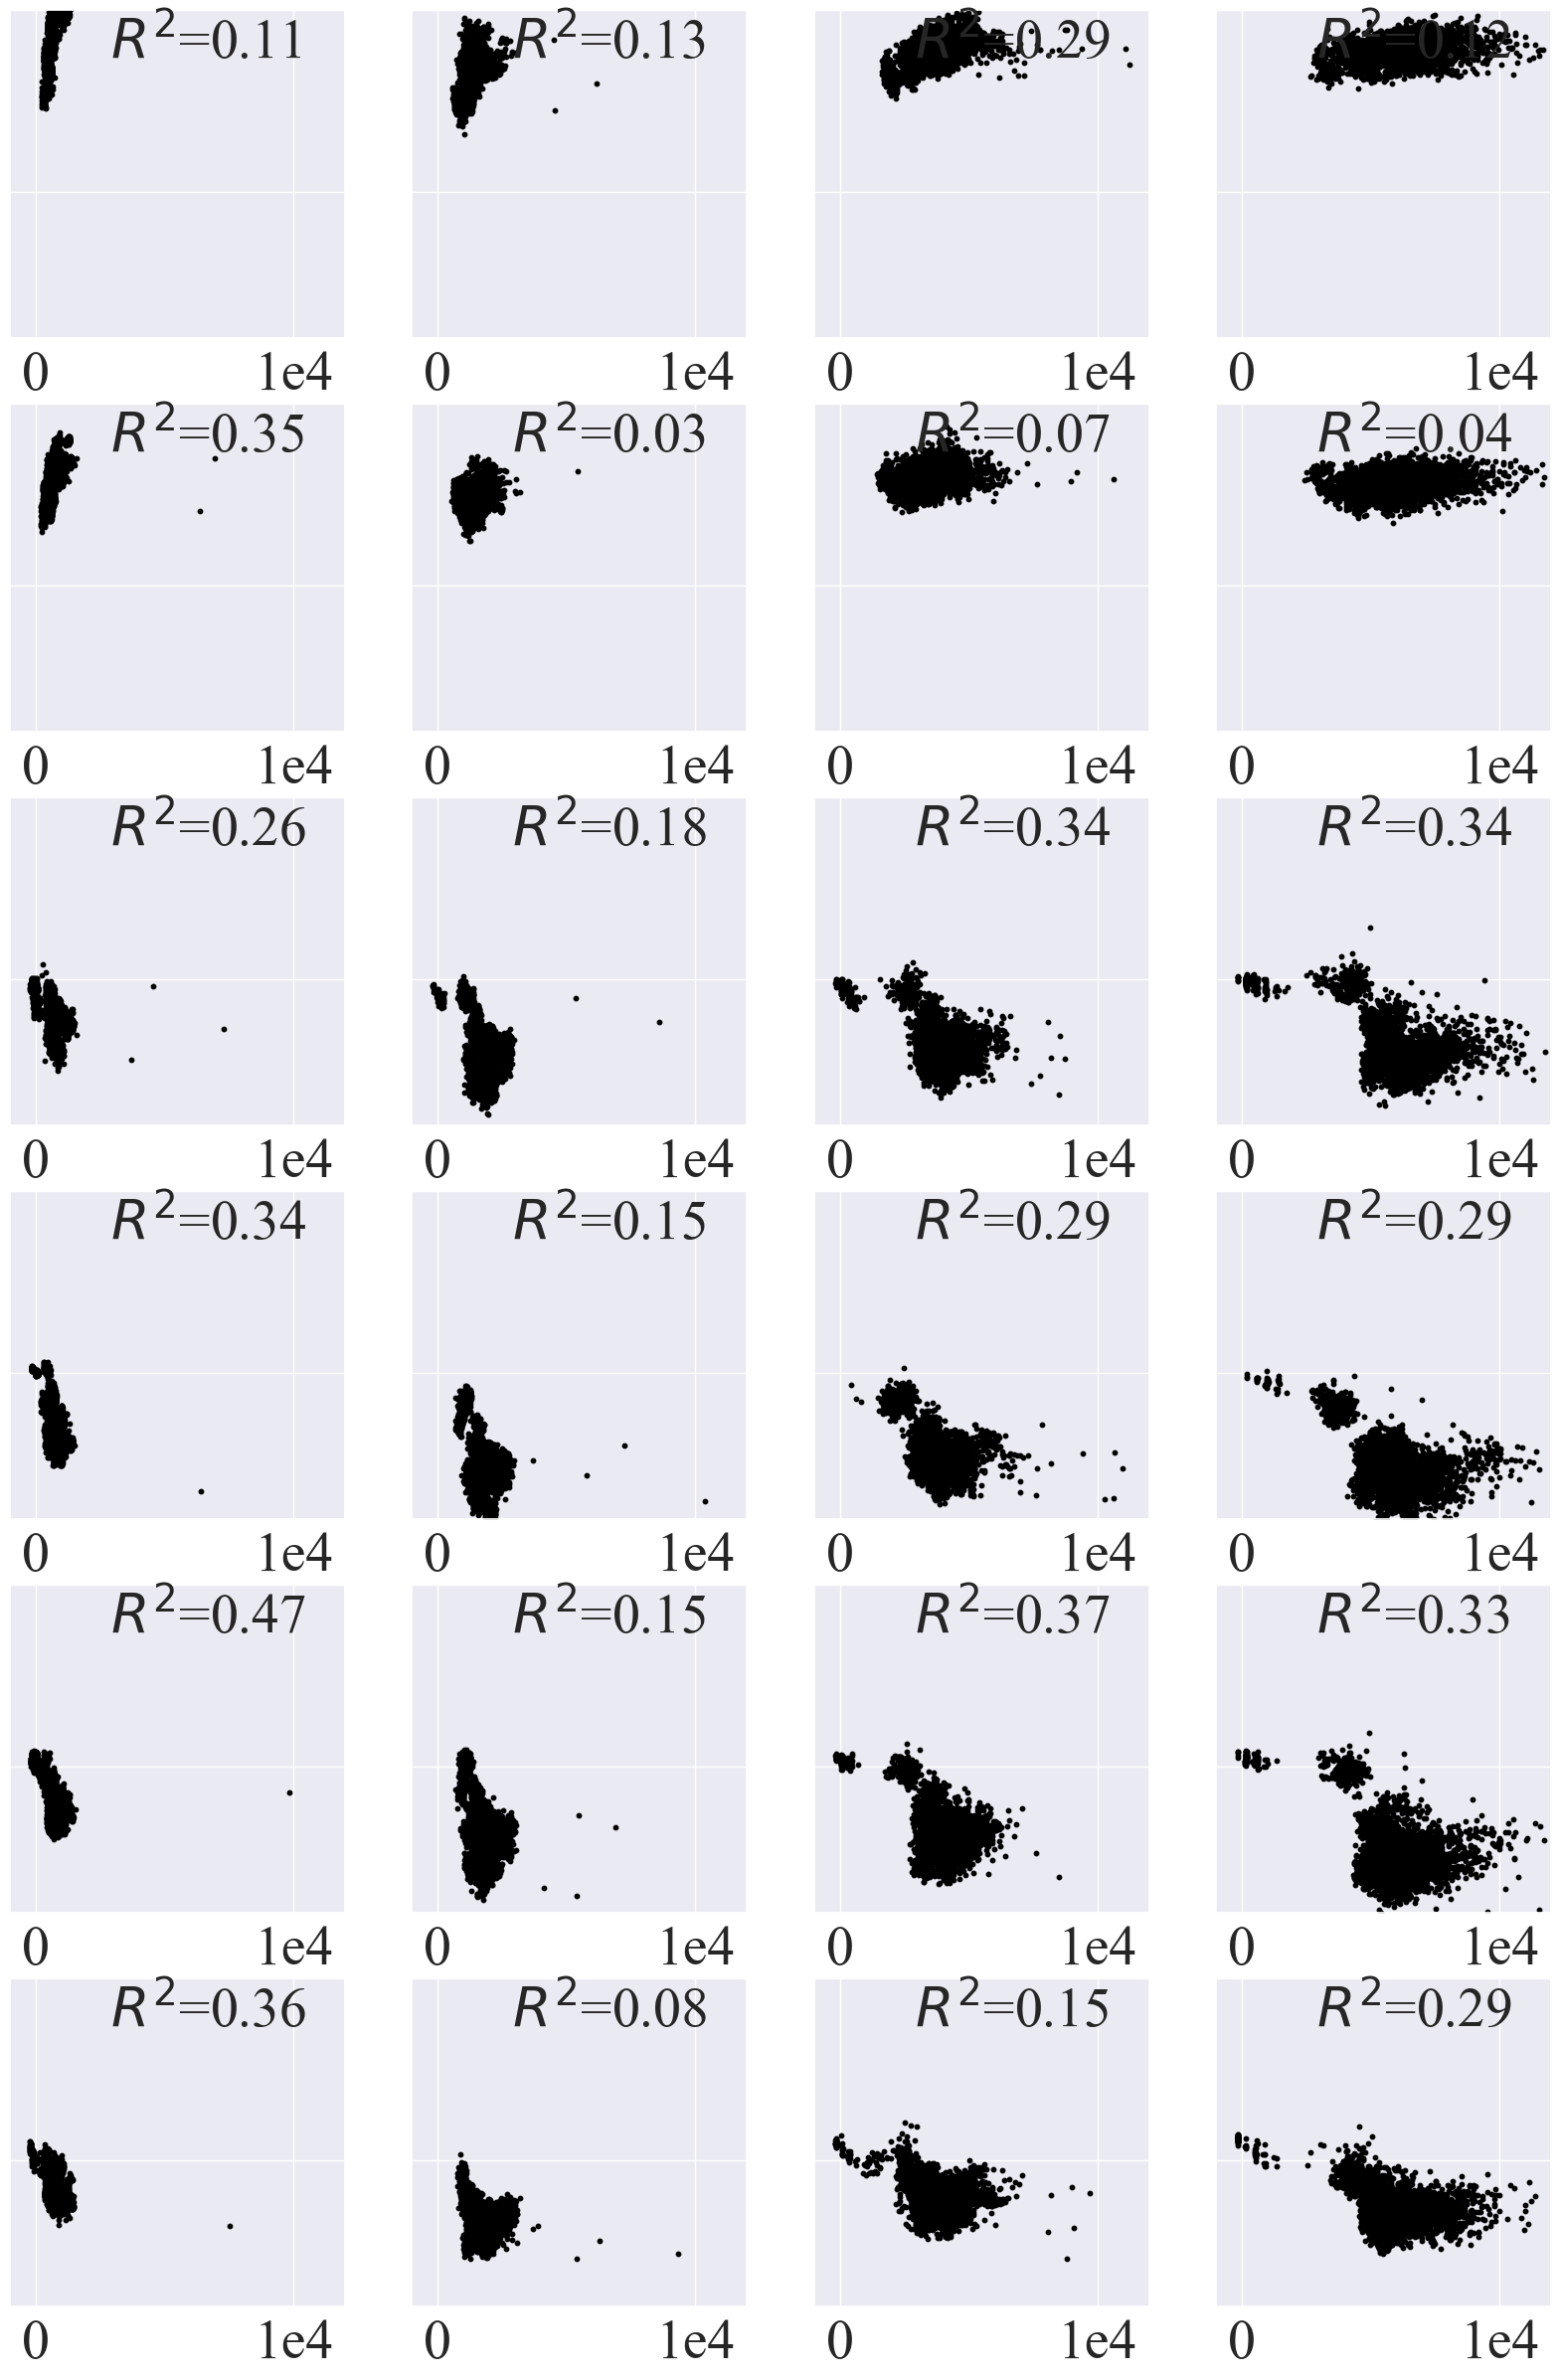

In [66]:
fig, axs = plt.subplots(6, 4, figsize=(20, 30))

for cif_id in range(len(cif_names)):
    cif_name = cif_names[cif_id]
    for N_id in range(len(Ns)):
        N = Ns[N_id]

        print(cif_id, N_id)
        print(cif_name, N)
        ax = axs[cif_id][N_id]
        best_N_cif_df = analysis_df[(analysis_df["N"] == N) & (analysis_df["cif_name"] == cif_name)]
        # best_N_cif_df = analysis_df[(analysis_df["N"] == N) & (analysis_df["cif_name"] == cif_name)]

        x = best_N_cif_df["ff"]
        y = best_N_cif_df["r_free"]

        print(x.corr(y))
        ax.scatter(x, y, s=10, color="black")

        ax.annotate("$R^2$={:.2f}".format(x.corr(y)**2), xy=(.3, .85), xycoords=ax.transAxes, fontsize=40)

        if j == 0:
            ax.tick_params(axis='y', labelsize=40)
        else:
            ax.tick_params(left = False, labelleft = False)

        if i == 3:
            ax.set_xticks([0, 10000])
            ax.set_xticklabels(['0', '1e4'])
            ax.tick_params(axis='x', labelsize=25)
        else:
            ax.tick_params(bottom=False, labelbottom=False)

        ax.set_xlim(-1000, 12000)
        ax.set_ylim(.22, .4)

        ax.tick_params(axis='x', labelsize=25)
        ax.tick_params(axis='y', labelsize=25)


    # plt.subplots_adjust(wspace=0.02, hspace=0.02)
    # plt.savefig(Path(Path.home(), "Desktop/fig.png"))